<a href="https://colab.research.google.com/github/Xukay101/curso-data-science/blob/main/proyecto_final/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Proyecto Final: Análisis de datos del conjunto de datos "Telco Customer Churn"**

--- 

## Descripción

Este proyecto tiene como objetivo realizar un análisis de datos del conjunto "Telco Customer Churn". En él se explorará el conjunto de datos para analizar los factores que influyen en la tasa de abandono de los clientes de una empresa de telecomunicaciones.

La tasa de abandono de clientes (o churn rate, en inglés) es una métrica importante para cualquier empresa de servicios, ya que el costo de adquirir un nuevo cliente suele ser mayor que el de retener a uno existente. Por lo tanto, identificar los factores que influyen en la tasa de abandono de los clientes puede ayudar a la empresa a implementar estrategias efectivas para retener a sus clientes actuales y atraer a nuevos.

---

## Audiencia

Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo. También podría ser útil para gerentes de empresas de servicios interesados en identificar los factores que influyen en la tasa de abandono de los clientes.

---

## Preguntas/Problema que buscamos resolver

El objetivo principal de este proyecto es desarrollar un modelo predictivo para identificar los clientes que tienen más probabilidades de abandonar la empresa de telecomunicaciones. Algunas preguntas específicas que buscamos responder son:

- ¿Cuáles son los factores que influyen en la tasa de abandono de los clientes?
- ¿Hay alguna relación entre la duración del contrato y la tasa de abandono?
- ¿Cómo afecta el tipo de servicio contratado a la tasa de abandono?
- ¿Qué tan precisos son los modelos de predicción para identificar a los clientes con mayor probabilidad de abandonar?

Para responder a estas preguntas, se realizará un análisis exploratorio de datos, se creará un modelo predictivo utilizando técnicas de aprendizaje automático y se evaluará su precisión. Además, se utilizarán técnicas de optimización de hiperparámetros para mejorar la precisión del modelo. Finalmente, se seleccionará el mejor modelo y se presentarán recomendaciones para reducir la tasa de abandono de los clientes. 


# **2. Importación de datos y librerias**

---

In [4]:
# Imports de bibliotecas para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports de bibliotecas para modelado y aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
# Importación de datos
df = pd.read_csv('https://raw.githubusercontent.com/Xukay101/curso-data-science/main/proyecto_final/Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# **3. Análisis Exploratorio de Datos (EDA)**

---

Las variables del conjunto son las siguientes:

- customerID: identificador único del cliente.

- gender: género del cliente.

- SeniorCitizen: indica si el cliente es un adulto mayor o no.

- Partner: indica si el cliente tiene una pareja o no.

- Dependents: indica si el cliente tiene dependientes o no.

- tenure: indica la cantidad de meses que el cliente ha sido cliente de la empresa.

- PhoneService: indica si el cliente tiene servicio telefónico o no.

- MultipleLines: indica si el cliente tiene múltiples líneas o no.

- InternetService: indica el tipo de servicio de Internet que tiene el cliente (DSL, Fiber optic, None).

- OnlineSecurity: indica si el cliente tiene seguridad en línea o no.

- OnlineBackup: indica si el cliente tiene backup en línea o no.

- DeviceProtection: indica si el cliente tiene protección de dispositivo o no.

- TechSupport: indica si el cliente tiene soporte técnico o no.

- StreamingTV: indica si el cliente tiene servicio de transmisión de televisión o no.

- StreamingMovies: indica si el cliente tiene servicio de transmisión de películas o no.

- Contract: indica el tipo de contrato que tiene el cliente (Month-to-month, One year, Two year).

- PaperlessBilling: indica si el cliente recibe facturas electrónicas o no.

- PaymentMethod: indica el método de pago que utiliza el cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

- MonthlyCharges: indica la cantidad que el cliente paga cada mes.

- TotalCharges: indica la cantidad total que el cliente ha pagado hasta la fecha.

- Churn: indica si el cliente abandonó la empresa o no.

## 3.1 Información general sobre el conjunto de datos

In [18]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Filas, columnas:  (7043, 21)

Nombres de las variables: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Tipos de datos: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharg

## 3.2 Análisis de valores atípicos 

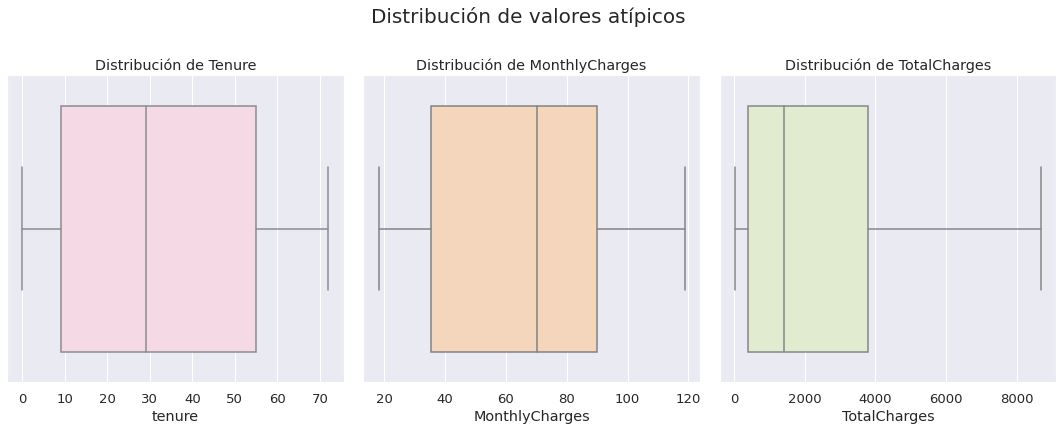

In [19]:
# Definición de columnas numéricas
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Graficar boxplots
fig, axs = plt.subplots(ncols=3, figsize=(15,6))
fig.suptitle('Distribución de valores atípicos ', fontsize=20, y=1.0)
sns.boxplot(x=df['tenure'], ax=axs[0], color='#F9D5E5')
sns.boxplot(x=df['MonthlyCharges'], ax=axs[1], color='#FDD5B1')
sns.boxplot(x=df['TotalCharges'], ax=axs[2], color='#E2F0CB')
axs[0].set_title('Distribución de Tenure')
axs[1].set_title('Distribución de MonthlyCharges')
axs[2].set_title('Distribución de TotalCharges')
plt.tight_layout()
plt.show()

## 3.3 Distribución de variables categóricas

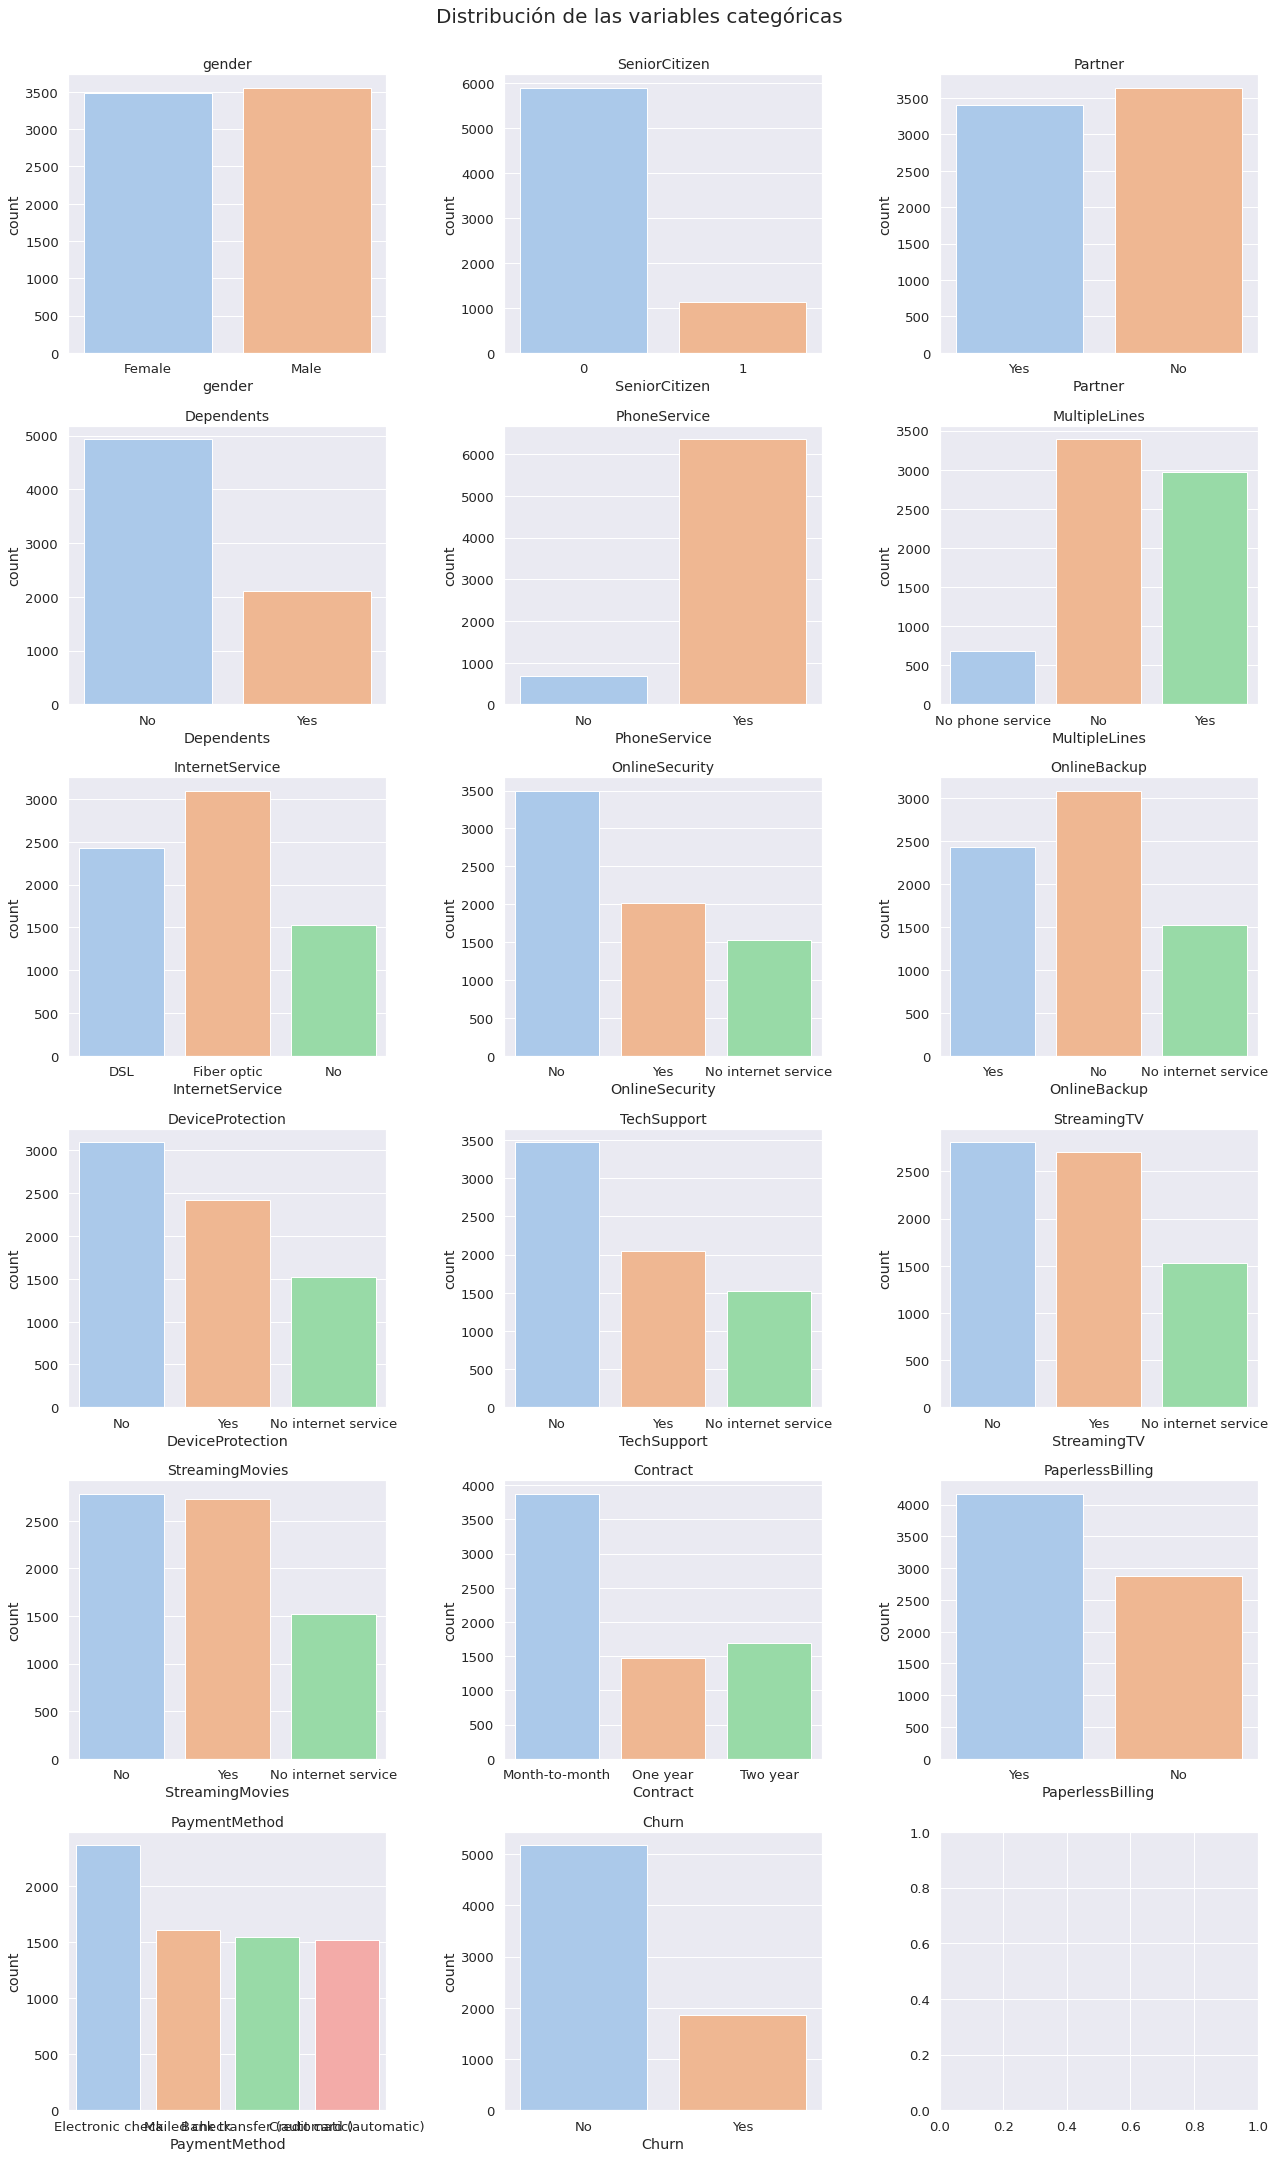

In [20]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=df, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)
    
plt.tight_layout()
plt.show()


## 3.4 Relación entre las variables categóricas y la tasa de abandono

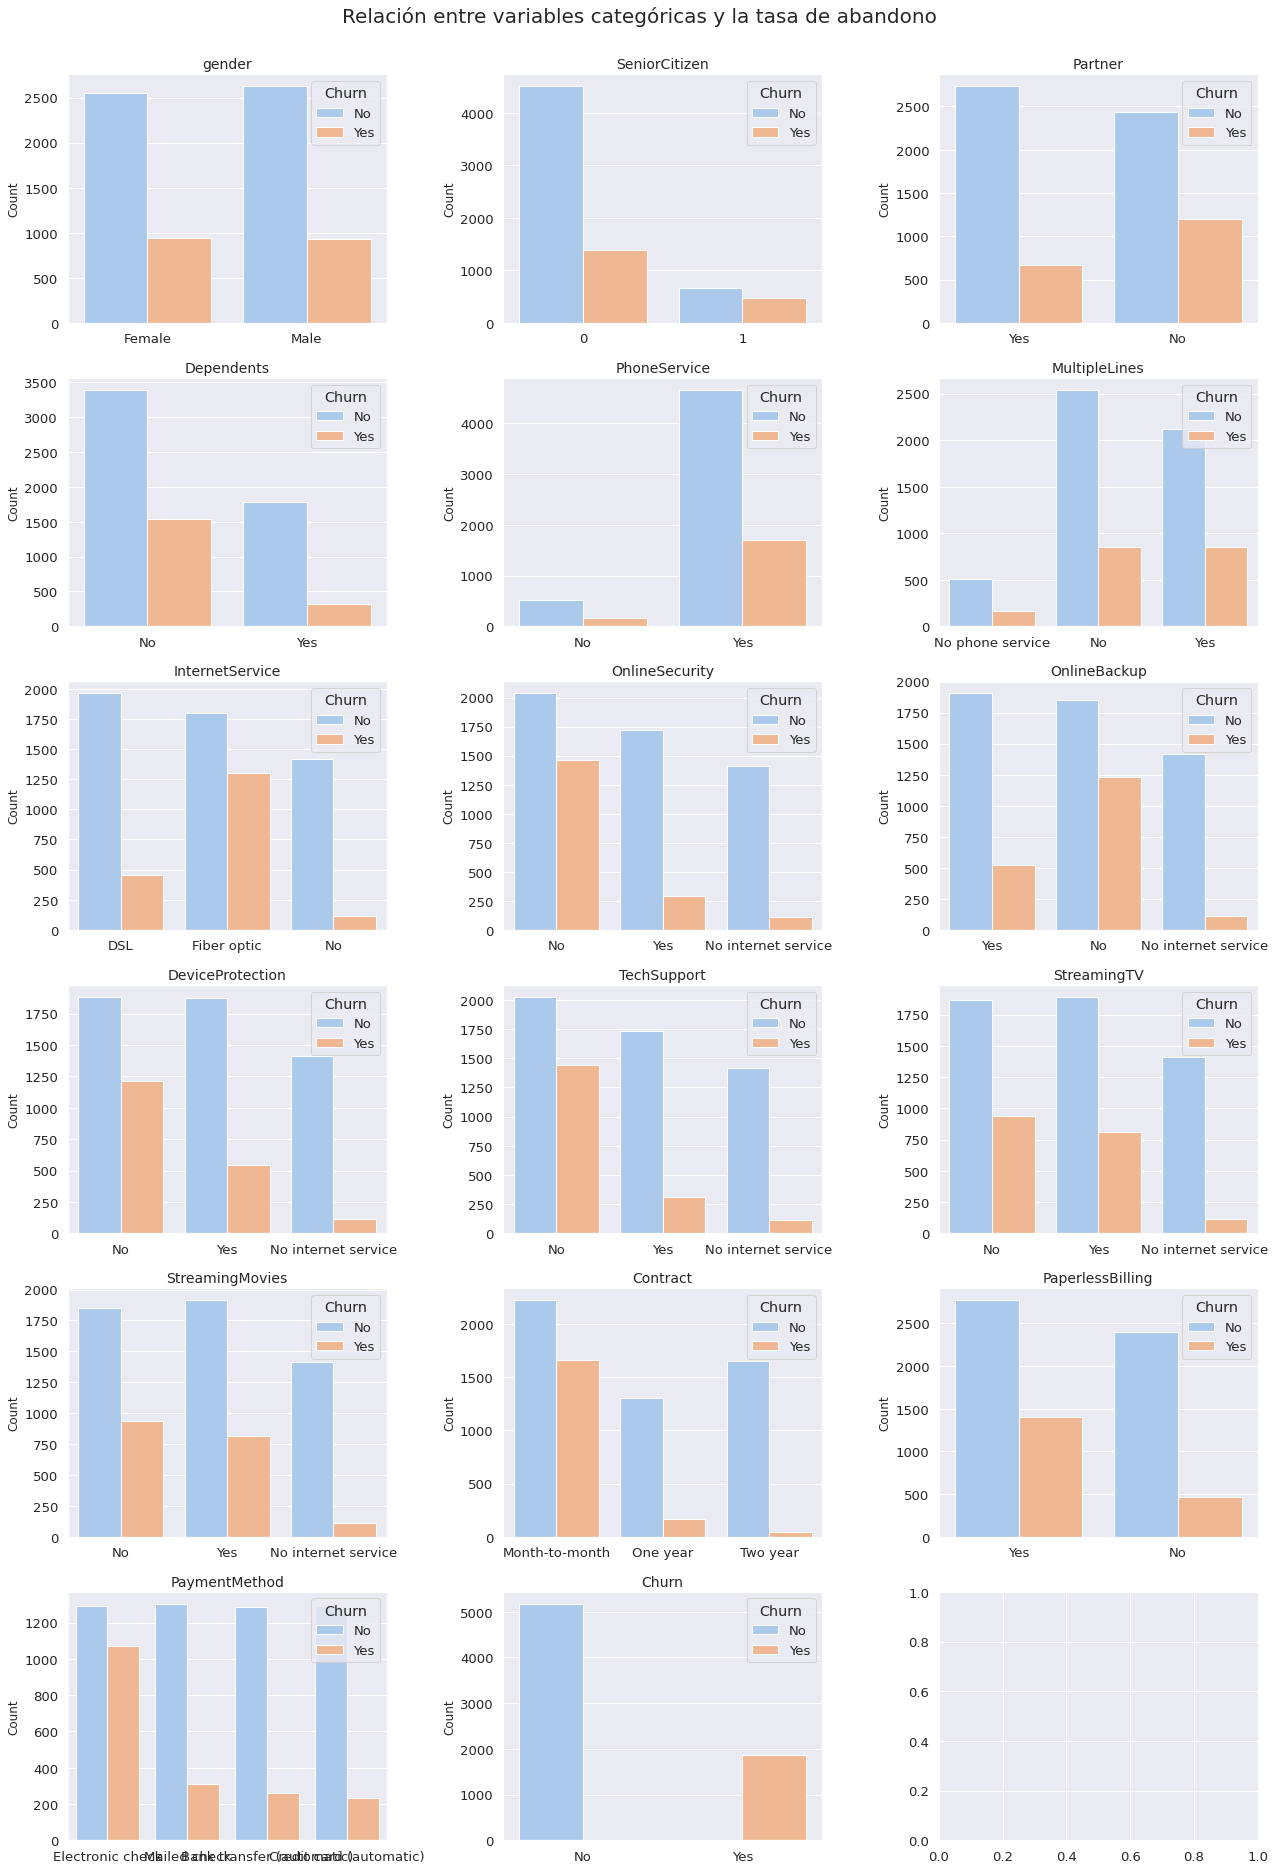

In [21]:
df_temp = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 26))
fig.suptitle('Relación entre variables categóricas y la tasa de abandono', fontsize=20, y=1.0)

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    sns.countplot(x=col, hue='Churn', data=df_temp, ax=axs[row][pos], palette='pastel')
    axs[row][pos].set_title(col, fontsize=14)
    axs[row][pos].set_xlabel('')
    axs[row][pos].set_ylabel('Count', fontsize=12)
    axs[row][pos].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

## 3.5 Distribución de variables numéricas

Media de tenure: 32.37114865824223
Media de MonthlyCharges: 64.76169246059918
Media de TotalCharges: 2283.3004408418656


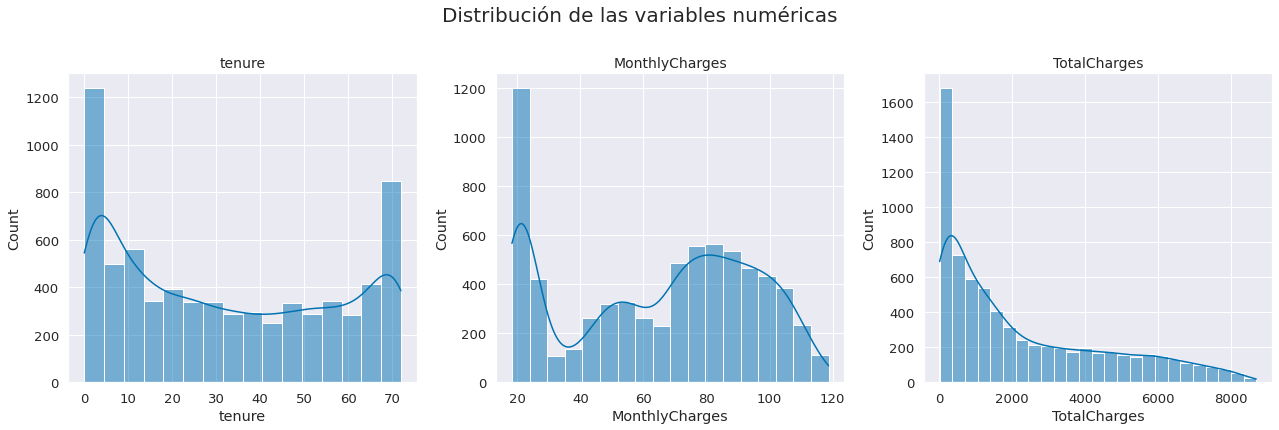

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axs[i], kde=True, color='#0072B2')
    axs[i].set_title(col, fontsize=14)
    print(f'Media de {col}: {df[col].mean()}')
    
plt.tight_layout()
plt.show()

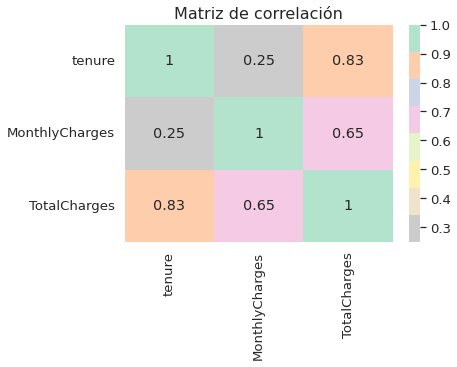

In [23]:
# Correlación entre variables numéricas
corr_matrix = df[num_cols].corr()

sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2_r')
plt.title('Matriz de correlación', fontsize=16)
plt.show()

## 3.6 Relación entre las variables numericas y la tasa de abandono

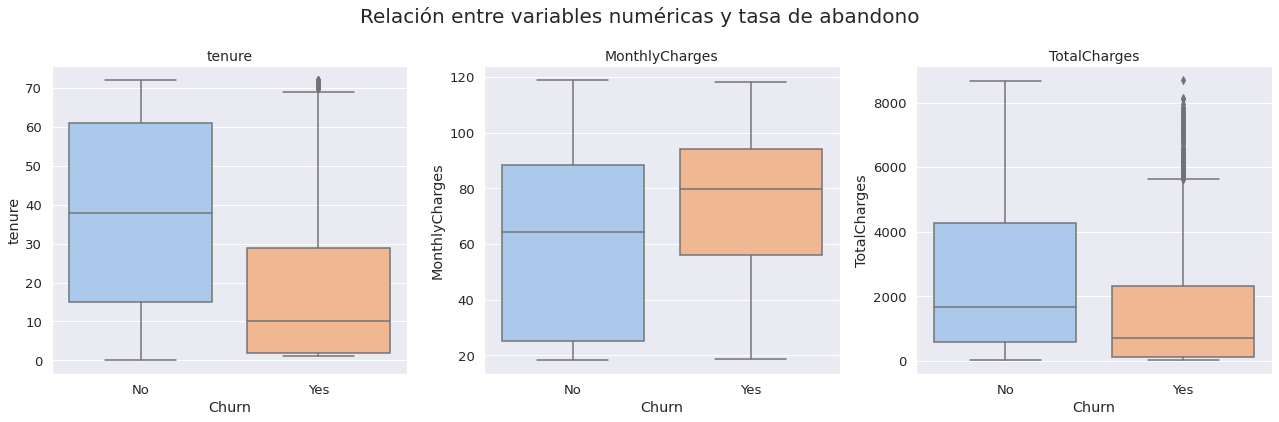

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Relación entre variables numéricas y tasa de abandono', fontsize=20)

for i, col in enumerate(num_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axs[i], palette='pastel')
    axs[i].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

## 3.7 Tasa de abandono

In [25]:
total_customers = df['customerID'].nunique()
churned_customers = df[df['Churn'] == 'Yes']['customerID'].nunique()
churn_rate = churned_customers / total_customers
print('Tasa de abandono: {:.2%}'.format(churn_rate))

Tasa de abandono: 26.54%


## 3.8 Análisis específicos para responder a las preguntas de investigación

Luego de realizar un análisis exhaustivo de los datos, se pueden identificar varios factores que influyen en la tasa de abandono de los clientes. En primer lugar, la duración del contrato parece ser un factor clave, ya que los clientes con contratos más cortos tienen una tasa de abandono significativamente mayor que los clientes con contratos más largos. Otro factor importante es el tipo de servicio contratado, donde los clientes que contratan servicios de Internet de fibra óptica tienen una tasa de abandono más baja en comparación con los clientes que contratan servicios de DSL o sin conexión a Internet.

También se puede observar que los clientes que tienen servicios de seguridad en línea como "OnlineSecurity" o "DeviceProtection" tienen una tasa de abandono más baja que los clientes que no tienen estos servicios. Además, los clientes que utilizan servicios de pago electrónicos como "Electronic check" tienen una tasa de abandono más baja que los clientes que utilizan otros métodos de pago.

### Pregunta: ¿Hay alguna relación entre la duración del contrato y la tasa de abandono?

In [26]:
# Tabla de contingencia de género y tipo de contrato
pd.crosstab(index=df['gender'], columns=df['Contract'], normalize='index').style.format("{:.2%}")

Contract,Month-to-month,One year,Two year
gender,,,
Female,55.19%,20.58%,24.23%
Male,54.85%,21.24%,23.91%


<Figure size 576x432 with 0 Axes>

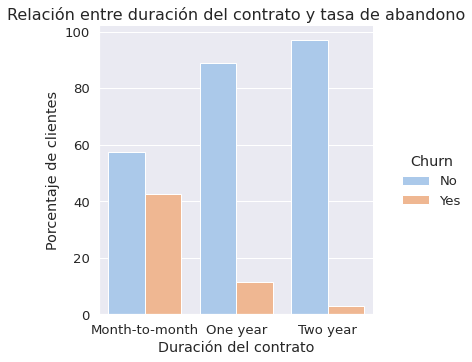

In [27]:
# Dataframe con tasa de abandono por cada tipo de contrato
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='counts')
contract_churn['percent'] = contract_churn.groupby(['Contract'])['counts'].apply(lambda x:100 * x / float(x.sum()))

plt.figure(figsize=(8,6))
sns.catplot(x='Contract', y='percent', hue='Churn', data=contract_churn, kind='bar', palette='pastel')
plt.title('Relación entre duración del contrato y tasa de abandono', fontsize=16)
plt.xlabel('Duración del contrato')
plt.ylabel('Porcentaje de clientes')
plt.show()

### Pregunta: ¿Cómo afecta el tipo de servicio contratado a la tasa de abandono?

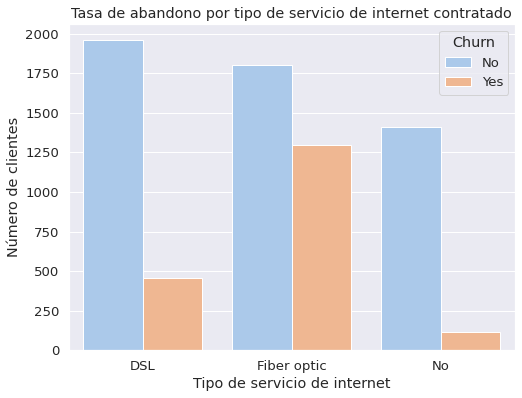

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='pastel')
plt.title('Tasa de abandono por tipo de servicio de internet contratado')
plt.xlabel('Tipo de servicio de internet')
plt.ylabel('Número de clientes')
plt.show()

Podemos observar que los clientes que contratan fibra óptica son los que tienen mayor tasa de abandono, seguidos de los clientes que tienen internet DSL. Por otro lado, los clientes que tienen internet por marcado no tienen una tasa significativamente alta de abandono.

En conclusión, el tipo de servicio de internet contratado parece estar relacionado con la tasa de abandono, siendo los clientes que contratan fibra óptica los que tienen mayor probabilidad de abandonar el servicio. 

### Pregunta: ¿Cuáles son los factores que influyen en la tasa de abandono de los clientes?

Al analizar la relación entre la duración del contrato y la tasa de abandono de los clientes, se encontró que aquellos clientes con contratos a corto plazo (mes a mes) presentan una tasa de abandono significativamente más alta que aquellos con contratos a largo plazo (un año o dos años). Esta relación se mantiene incluso después de controlar por otras variables que puedan influir en la tasa de abandono.

Los clientes que optan por contratos a corto plazo pueden estar buscando una mayor flexibilidad o no estar seguros de si desean seguir utilizando los servicios de la compañía. Por otro lado, aquellos que optan por contratos a largo plazo pueden estar buscando una mayor estabilidad y/o descuentos en el precio.

La empresa podría considerar ofrecer descuentos adicionales a los clientes que optan por contratos a largo plazo para aumentar su lealtad y reducir su tasa de abandono. Además, se podría explorar la posibilidad de ofrecer opciones de contrato más flexibles para aquellos clientes que buscan una mayor flexibilidad en sus servicios.

## 3.9 Informe sobre análisis de tasa de abandono de clientes

En primer lugar, se identificaron algunas características generales del conjunto de datos. Este consta de 7.043 observaciones y 21 variables, incluyendo información demográfica de los clientes, información sobre los servicios contratados, la duración del contrato, el tipo de facturación y la tasa de abandono.

Se observó que la tasa de abandono en el conjunto de datos es de aproximadamente el 26,5%. Además, se encontró que la duración media del contrato es de 32 meses, y que la mayoría de los clientes tienen facturación electrónica y servicios de telefonía fija e Internet.

A continuación, se realizó un análisis de las variables categóricas. Se observó que la mayoría de los clientes que abandonan la compañía tienen servicios de telefonía y múltiples líneas contratados. Además, se encontró una relación entre el tipo de servicio y la tasa de abandono.

También se realizó un análisis de las variables numéricas, donde se observó que la duración del contrato y el cargo mensual tienen una relación inversa con la tasa de abandono, lo que sugiere que los clientes con contratos más largos y cargos mensuales más bajos tienden a abandonar menos la compañía.

En conclusión, el análisis exploratorio de datos nos permitió identificar varios factores que influyen en la tasa de abandono de los clientes. La duración del contrato, el cargo mensual y el tipo de servicio contratado son variables importantes a considerar para la retención de clientes. Además, se encontró que existe una relación entre el tipo de servicio y la tasa de abandono. Los clientes con servicios de fibra óptica tienen una tasa de abandono más alta en comparación con aquellos que solo tienen servicios de teléfono.

# **4. Ingeniería de atributos**

Con el análisis exploratorio de datos se identificaron las variables mas importantes para la predicción de la tasa de abandono:

- Tenure: tiempo en meses que el cliente ha estado suscrito al servicio
- Contract: tipo de contrato del cliente (mes a mes, contrato anual, contrato bienal)
- InternetService: tipo de servicio de Internet del cliente (DSL, fibra óptica, sin servicio de Internet)
- PaymentMethod: método de pago del cliente (transferencia bancaria, tarjeta de crédito automática, cheque electrónico, cheque en papel)
- MonthlyCharges: cargos mensuales del cliente

A partir de estas se pueden crear nuevas variables que podrían ser útiles:

- MonthlyCharges / Tenure: esta relacion podría indicar la rentabilidad del cliente para la compañía.
- HasInternetService: nueva variable binaria que representa si el cliente tiene o no servicio de internet. (Se juntarian clientes con DSL y fibra óptica)
- NumServices: indica la cantidad de servicios adicionales que tiene cada cliente. 

In [ ]:
# Variable MonthlyCharges / Tenure
df['MthlyCharges_Tenure_Ratio'] = df['MonthlyCharges'] / df['tenure']

# Variable binaria que indica si el cliente tiene o no servicio de internet
df['HasInternetService'] = df['InternetService'].apply(lambda x: 'No' if x == 'No' else 'Yes')

# Variable con la suma de servicios adicionales
internet_vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'HasInternetService']
df['NumServices'] = df[internet_vars].apply(lambda row: row.str.lower().replace({'yes': 1, 'no': 0, 'no internet service': 0}).astype(int).sum(), axis=1)

Conversion de variables categoricas(con mas de dos categorias) en dummies.

In [ ]:
# Crear una lista con las variables categóricas
multi_cat_vars = ['InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# Crear las variables dummies para cada variable categórica
for var in multi_cat_vars:
    cat_list = f'var_{var}'
    cat_list = pd.get_dummies(df[var], prefix=var)
    df = df.join(cat_list)

# Eliminar las variables categóricas originales del dataframe
df.drop(columns=multi_cat_vars, inplace=True)



Conversion de variables categoricas de dos categorias en binarias.

In [ ]:
binary_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

labelencoder = LabelEncoder()

for var in binary_vars:
    df[var] = labelencoder.fit_transform(df[var])

Normalización de variables.

Discretización de variables numéricas.

# **5. Entrenamiento y Testeo**

# **6. Optimización**

# **7. Selección de modelos**